In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, TargetEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,make_scorer,ConfusionMatrixDisplay,roc_curve, auc, precision_recall_curve, average_precision_score,silhouette_score
from sklearn.impute import SimpleImputer    
from sklearn.cluster import KMeans,  DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
import matplotlib.cm as cm
from sklearn.feature_selection import RFECV

In [2]:
df = pd.read_csv("Real_Estate_Sales_10012020_to_Current.csv")
df

,OBJECTID,PropertyID,xrCompositeLandUseID,xrBuildingTypeID,ParcelID,LocationStartNumber,ApartmentUnitNumber,StreetNameAndWay,xrPrimaryNeighborhoodID,LandSF,...,OwnerFirstName,PrimaryGrantor,SaleDate,SalePrice,TotalAppraisedValue,LegalReference,xrSalesValidityID,xrDeedID,AssrLandUse,GlobalID
0,1,8,3,6.0,121-698-063,77,NaN,STAFFORD ST,2,6000.0,...,LAKESHA,SCOTT NASTASSIA,2024/07/01 00:00:00+00,259000.0,187200,08275 0343,1,10,ONE FAMILY,{78B6AAB5-D21E-471C-85BE-022DAB2A80B7}
1,2,9,3,3.0,121-698-062,73,NaN,STAFFORD ST,2,6000.0,...,ARCADIO,DIAZ RAFAEL,2022/04/26 00:00:00+00,208000.0,192300,07948-0001,1,10,ONE FAMILY,{15F34650-E463-4047-8808-A056FCDA3E09}
2,3,12,3,6.0,144-698-066,61,NaN,STAFFORD ST,2,6000.0,...,CATIRIA,KERN THOMAS,2023/12/22 00:00:00+00,125000.0,148400,08197-0077,1,10,ONE FAMILY,{C6FCA409-022A-4F1B-A674-13996FD1FE86}
3,4,20,3,6.0,144-698-058,29,NaN,STAFFORD ST,2,6000.0,...,REBECA,RAMOS MIGUEL JR,2023/09/29 00:00:00+00,1.0,167300,08158 0179,5,8,ONE FAMILY,{4D1DDED3-EF58-4091-A5F1-C7CA38B38C74}
4,5,25,3,6.0,144-698-053,211,NaN,NEWINGTON AVE,2,5040.0,...,LOURDES,BAIJANATH BISSNOW P,2021/01/11 00:00:00+00,177000.0,197900,07701-0245,1,10,ONE FAMILY,{F2E9A7CC-96D2-47AE-A2C1-59745FBE9C9E}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,7406,29769,7,18.0,161-503-064,98,B,BROOKFIELD ST,512,0.0,...,TAMMIE,ABEL QUALITY CONSTRUCTION LLC,2024/04/22 00:00:00+00,315000.0,249500,08242 0210,1,10,CONDOMINIMUM,{807D4D88-119F-478B-8783-2FCB6854D106}
7406,7407,29769,7,18.0,161-503-064,98,B,BROOKFIELD ST,512,0.0,...,TAMMIE,ABEL QUALITY CONSTRUCTION LLC,2024/05/17 00:00:00+00,0.0,249500,08251 0180,5,18,CONDOMINIMUM,{CA3871C1-EC6B-47AD-85B2-A93C8E4E49C8}
7407,7408,29769,7,18.0,161-503-064,98,B,BROOKFIELD ST,512,0.0,...,TAMMIE,BURGOS ISAAC,2024/08/26 00:00:00+00,0.0,249500,08296 0073,5,8,CONDOMINIMUM,{BF5642DB-2E1E-49E5-91BE-ABD301FB052E}
7408,7409,29770,7,18.0,161-503-065,98,C,BROOKFIELD ST,512,0.0,...,EDUARDO,ABEL QUALITY CONSTRUCTION LLC,2024/04/22 00:00:00+00,315000.0,249800,08242 0248,1,10,CONDOMINIMUM,{8B22BA6B-345F-4E00-8CFE-916BC92B6F32}


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7410 entries, 0 to 7409
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   OBJECTID                 7410 non-null   int64  
 1   PropertyID               7410 non-null   int64  
 2   xrCompositeLandUseID     7410 non-null   int64  
 3   xrBuildingTypeID         7409 non-null   float64
 4   ParcelID                 7410 non-null   object 
 5   LocationStartNumber      7410 non-null   int64  
 6   ApartmentUnitNumber      1938 non-null   object 
 7   StreetNameAndWay         7410 non-null   object 
 8   xrPrimaryNeighborhoodID  7410 non-null   int64  
 9   LandSF                   5479 non-null   float64
 10  TotalFinishedArea        7237 non-null   float64
 11  LivingUnits              7409 non-null   float64
 12  OwnerLastName            7410 non-null   object 
 13  OwnerFirstName           4515 non-null   object 
 14  PrimaryGrantor          

In [4]:
df.isnull().sum()

OBJECTID                      0
PropertyID                    0
xrCompositeLandUseID          0
xrBuildingTypeID              1
ParcelID                      0
LocationStartNumber           0
ApartmentUnitNumber        5472
StreetNameAndWay              0
xrPrimaryNeighborhoodID       0
LandSF                     1931
TotalFinishedArea           173
LivingUnits                   1
OwnerLastName                 0
OwnerFirstName             2895
PrimaryGrantor                1
SaleDate                      0
SalePrice                   339
TotalAppraisedValue           0
LegalReference                1
xrSalesValidityID             0
xrDeedID                      0
AssrLandUse                   0
GlobalID                      0
dtype: int64

In [5]:
df.nunique()

OBJECTID                   7410
PropertyID                 5113
xrCompositeLandUseID          8
xrBuildingTypeID             21
ParcelID                   5113
LocationStartNumber         647
ApartmentUnitNumber         788
StreetNameAndWay            421
xrPrimaryNeighborhoodID     159
LandSF                     1354
TotalFinishedArea          2781
LivingUnits                   8
OwnerLastName              3188
OwnerFirstName             1823
PrimaryGrantor             5456
SaleDate                    976
SalePrice                   914
TotalAppraisedValue        2287
LegalReference             6387
xrSalesValidityID            19
xrDeedID                     19
AssrLandUse                   8
GlobalID                   7410
dtype: int64

# Data Cleaning and Preprocessing

We observed that both the property identifier and the parcel identifier contained the same number of unique values. Therefore, we verified whether each value in one column corresponded uniquely to a single value in the other, confirming that there are no cases of multiple parcels associated with a single property or multiple properties associated with a single parcel.

In [6]:
df.groupby('ParcelID')['PropertyID'].nunique().sort_values(ascending=False).head(10)

ParcelID
104-001-013    1
225-432-004    1
225-433-038    1
225-433-037    1
225-433-016    1
225-432-062    1
225-432-061    1
225-432-057    1
225-432-052    1
225-432-003    1
Name: PropertyID, dtype: int64

In [7]:
df.groupby('PropertyID')['ParcelID'].nunique().max()

1

In [8]:
df.groupby('AssrLandUse')['xrCompositeLandUseID'].describe()

,count,mean,std,min,25%,50%,75%,max
AssrLandUse,,,,,,,,
APT CRDA,4.0,455.0,0.0,455.0,455.0,455.0,455.0,455.0
APT FOUR,80.0,452.0,0.0,452.0,452.0,452.0,452.0,452.0
CONDO GARAGE,173.0,10.0,0.0,10.0,10.0,10.0,10.0,10.0
CONDOMINIMUM,1768.0,7.0,0.0,7.0,7.0,7.0,7.0,7.0
MULTI DWLG,6.0,9.0,0.0,9.0,9.0,9.0,9.0,9.0
ONE FAMILY,2477.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0
THREE FAMILY,1617.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0
TWO FAMILY,1285.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0


In [9]:
'''
Based on the exploratory analysis, 
we decided to remove features that either served only as unique identifiers or 
duplicated information already captured by other variables. 
Since these features did not add meaningful predictive value and could introduce unnecessary noise or redundancy, 
they were excluded from the feature set prior to modeling.

This redundancy was also observed between AssrLandUse and its numeric encoding xrCompositeLandUseID, 
where each land-use category corresponded to a single, fixed composite identifier. 
Since xrCompositeLandUseID did not introduce additional information beyond AssrLandUse, 
it was excluded from the feature set.
'''

df.drop(columns=['OBJECTID','GlobalID','PropertyID','xrCompositeLandUseID'], inplace=True)

# Remove records representing standalone garages rather than residential units
df = df[df['AssrLandUse'] != "CONDO GARAGE"]

df= df[~df['PrimaryGrantor'].isnull() & ~df['LegalReference'].isnull() & ~df['xrBuildingTypeID'].isnull()]
df = df[~df['SalePrice'].isnull()]

## Categorical Feature Processing

In [10]:
# Impute missing OwnerFirstName values based on matching OwnerLastName

df = df.copy()
mask_missing = df['OwnerFirstName'].isna()

# LLC → company
df.loc[
    mask_missing & df['OwnerLastName'].str.contains('llc', case=False, na=False),
    'OwnerFirstName'
] = 'company'

# NOT LLC → unknown
df.loc[
    mask_missing & ~df['OwnerLastName'].str.contains('llc', case=False, na=False),'OwnerFirstName'] = 'unknown'


# Check
print("OwnerFirstName – Imputation based on LLC")
print("----------------------------------------")
print(f"Filled as 'company': {(df['OwnerFirstName'] == 'company').sum()}")
print(f"Filled as 'unknown': {(df['OwnerFirstName'] == 'unknown').sum()}")
print(f"Remaining missing values: {df['OwnerFirstName'].isna().sum()}")


OwnerFirstName – Imputation based on LLC
----------------------------------------
Filled as 'company': 1737
Filled as 'unknown': 841
Remaining missing values: 0


In [11]:
# mark as apartment if AssrLandUse contains any of these substrings
pattern = '|'.join(['CONDOMINIMUM', 'APT FOUR', 'MULTI DWLG', 'APT CRDA'])
df['apartment/privateProperty'] = np.where(df['AssrLandUse'].str.contains(pattern, case=False, na=False), 'Apartment', 'Private House')

### The creation of a new feature to serve as the target variable for the project’s research question.

In [12]:

df['SaleAboveAppraisedValue'] = (df['SalePrice'] > df['TotalAppraisedValue']).astype(int)

In [13]:
# Creating time columns
df["SaleDate"] = pd.to_datetime(df["SaleDate"], errors="coerce")
df["SaleYear"] = df["SaleDate"].dt.year
df["SaleMonth"] = df["SaleDate"].dt.month
df['SaleQuarter'] = df['SaleDate'].dt.quarter

<Axes: title={'center': 'Proportion of Sales Above Appraised Value Over Time'}, xlabel='SaleYear'>

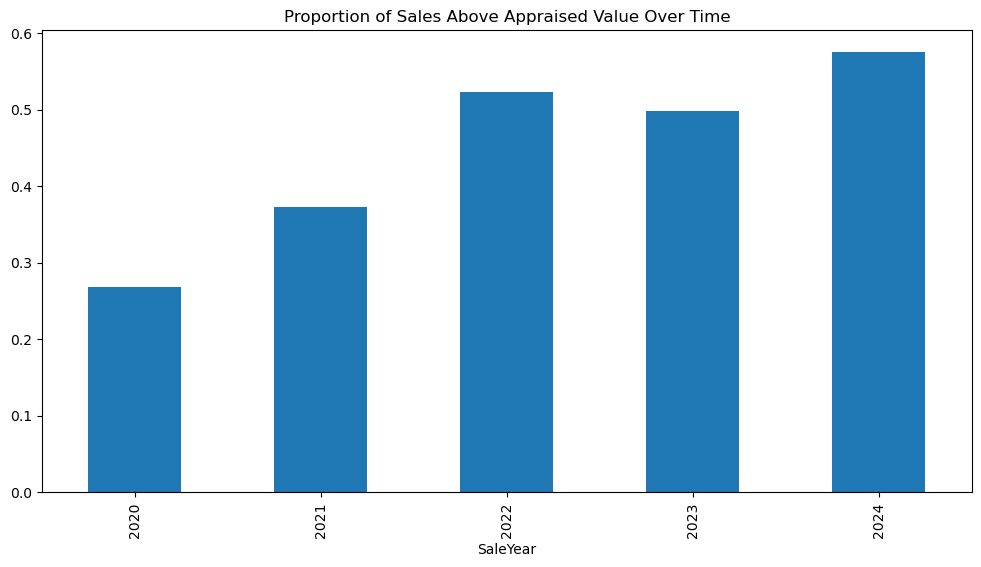

In [14]:
df.groupby(['SaleYear'])['SaleAboveAppraisedValue'].mean().plot(kind='bar', figsize=(12,6), title='Proportion of Sales Above Appraised Value Over Time')

In [15]:
"""
Feature Engineering Rationale:
We generated these features to uncover latent patterns not visible in the raw data, such as property quality (density), local demand (street popularity), and seller profile (institutional vs. private).
These features allow the model to distinguish between fundamentally different transaction types (e.g., bulk developer sales vs. single private listings).
The goal is to translate domain knowledge and business logic into numerical values to improve predictive accuracy.

Example - 'Repeat_Grantor':
This feature identifies recurring sellers. Our assumption is that a higher transaction frequency indicates greater market expertise, which directly influences the asking price.
"""
df['AreaPerUnit'] = df['TotalFinishedArea'] / df['LivingUnits']
df['num_of_transactions'] = df.groupby('OwnerLastName')['SalePrice'].transform('count')
df['AppraisalPerSqFt'] = df['TotalAppraisedValue'] / df['TotalFinishedArea']
df['Price_Level'] = pd.qcut(df['TotalAppraisedValue'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
df['Street_Popularity'] = df['StreetNameAndWay'].map(df['StreetNameAndWay'].value_counts())
df['Land_to_Building_Ratio'] = df['LandSF'] / df['TotalFinishedArea']
df['Repeat_Grantor'] = df.duplicated(subset=['PrimaryGrantor'], keep=False).astype(int)
df['Owner_Turnover_Rate'] = df.groupby('OwnerLastName')['SaleDate'].transform(lambda x: x.nunique()) / df.groupby('OwnerLastName')['SaleDate'].transform('count')
df['BuildingType_Popularity'] = df['xrBuildingTypeID'].map(df['xrBuildingTypeID'].value_counts())

In [16]:
# Handling property-type specific features (Houses vs. Apartments)
df = df.copy()
df.loc[df['apartment/privateProperty'] == 'Private House','ApartmentUnitNumber'] = -2
df.loc[df['apartment/privateProperty'] == 'Apartment','LandSF'] = np.nan

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6898 entries, 0 to 7409
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   xrBuildingTypeID           6898 non-null   float64            
 1   ParcelID                   6898 non-null   object             
 2   LocationStartNumber        6898 non-null   int64              
 3   ApartmentUnitNumber        6806 non-null   object             
 4   StreetNameAndWay           6898 non-null   object             
 5   xrPrimaryNeighborhoodID    6898 non-null   int64              
 6   LandSF                     5095 non-null   float64            
 7   TotalFinishedArea          6898 non-null   float64            
 8   LivingUnits                6898 non-null   float64            
 9   OwnerLastName              6898 non-null   object             
 10  OwnerFirstName             6898 non-null   object             
 11  PrimaryGr

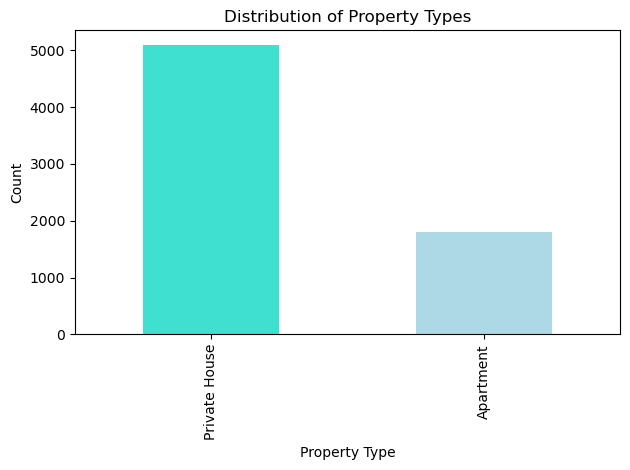

In [18]:
colors = ['#40E0D0', '#ADD8E6'] 
df['apartment/privateProperty'].value_counts().plot(kind='bar',color=colors)
plt.title('Distribution of Property Types')
plt.ylabel('Count')
plt.xlabel('Property Type')
plt.tight_layout()
plt.show()

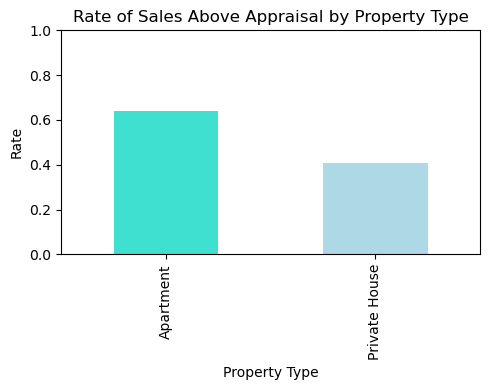

In [19]:
rate_by_type = df.groupby('apartment/privateProperty')['SaleAboveAppraisedValue'].mean()
plt.figure(figsize=(5,4))
colors = ['#40E0D0', '#ADD8E6']  
rate_by_type.plot(kind='bar', color=colors)

plt.title('Rate of Sales Above Appraisal by Property Type')
plt.ylabel('Rate')
plt.xlabel('Property Type')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

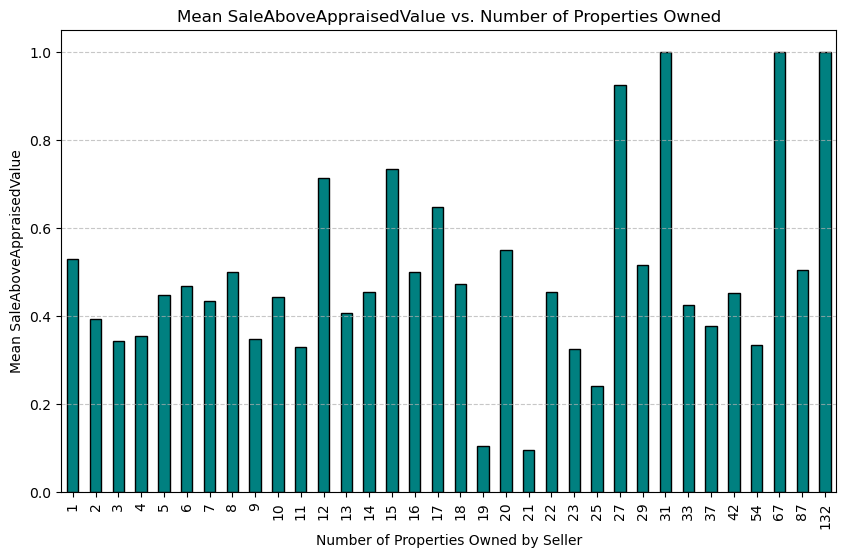

In [20]:
'''This figure shows the average rate of properties sold above their appraised value 
as a function of the number of properties owned by a seller.'''

price_by_owner_count = df.groupby('num_of_transactions')['SaleAboveAppraisedValue'].mean()
plt.figure(figsize=(10, 6))
price_by_owner_count.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Mean SaleAboveAppraisedValue vs. Number of Properties Owned')
plt.xlabel('Number of Properties Owned by Seller')
plt.ylabel('Mean SaleAboveAppraisedValue')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

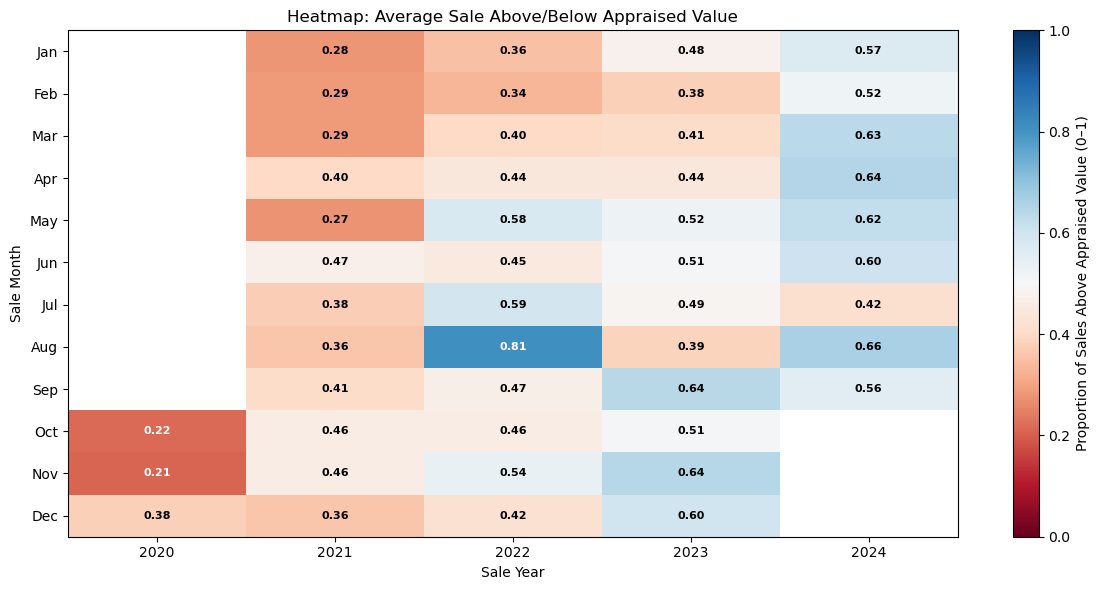

In [21]:
pivot_val = df.pivot_table(
    index="SaleMonth",
    columns="SaleYear",
    values="SaleAboveAppraisedValue",
    aggfunc="mean"
).sort_index()

month_names = ["Jan","Feb","Mar","Apr","May","Jun",
               "Jul","Aug","Sep","Oct","Nov","Dec"]

plt.figure(figsize=(12, 6))
plt.imshow(pivot_val.values, aspect="auto", cmap="RdBu", vmin=0, vmax=1)
plt.colorbar(label="Proportion of Sales Above Appraised Value (0–1)")
plt.xticks(range(len(pivot_val.columns)), pivot_val.columns)
plt.yticks(range(12), month_names)
plt.xlabel("Sale Year")
plt.ylabel("Sale Month")
plt.title("Heatmap: Average Sale Above/Below Appraised Value")

for i in range(pivot_val.shape[0]):
    for j in range(pivot_val.shape[1]):
        value = pivot_val.iloc[i, j]
        if not pd.isna(value):
            text_color = "white" if abs(value - 0.5) > 0.25 else "black"
            plt.text(
                j, i,
                f"{value:.2f}",
                ha="center",
                va="center",
                color=text_color,
                fontsize=8,
                fontweight="bold")
plt.tight_layout()
plt.show()

<Axes: xlabel='SaleYear,SaleMonth'>

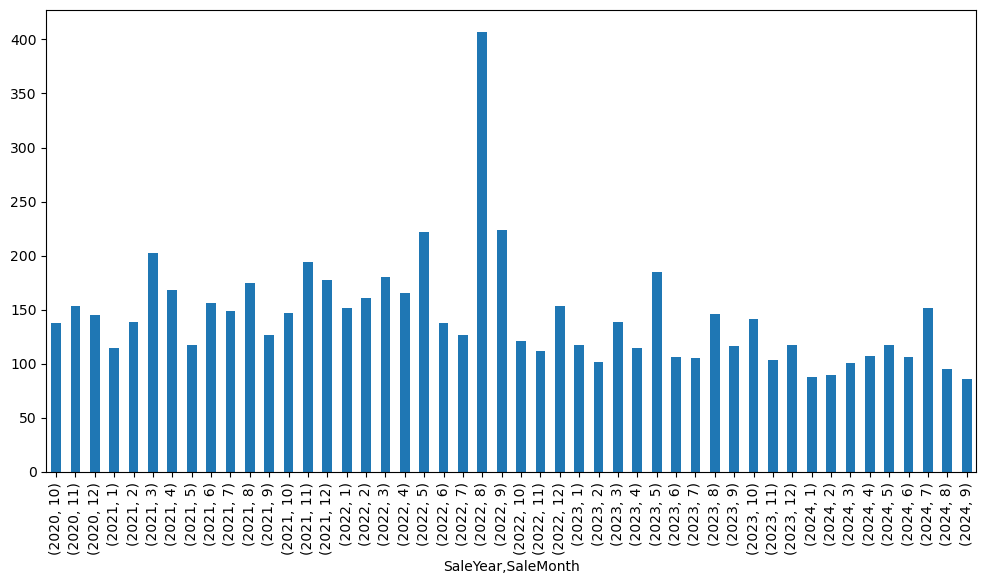

In [22]:
df.groupby(['SaleYear', 'SaleMonth'])['TotalFinishedArea'].count().plot(kind='bar', figsize=(12,6))

The analysis does not indicate a consistent seasonal trend across months and years. However, August 2022 stands out as an exceptional period, showing both a high proportion of sales above the appraised value and a relatively high transaction volume, suggesting a localized market anomaly rather than a general temporal pattern.

In [23]:
df.select_dtypes(include=[np.number]).corr()

,xrBuildingTypeID,LocationStartNumber,xrPrimaryNeighborhoodID,LandSF,TotalFinishedArea,LivingUnits,SalePrice,TotalAppraisedValue,xrSalesValidityID,xrDeedID,...,SaleMonth,SaleQuarter,AreaPerUnit,num_of_transactions,AppraisalPerSqFt,Street_Popularity,Land_to_Building_Ratio,Repeat_Grantor,Owner_Turnover_Rate,BuildingType_Popularity
xrBuildingTypeID,1.000000,0.004202,0.565508,-0.092647,0.058589,0.117684,0.178382,-0.027294,0.177042,0.109430,...,-0.010287,-0.008246,-0.360054,0.291713,-0.542022,0.434302,-0.679712,0.237711,-0.337149,0.558177
LocationStartNumber,0.004202,1.000000,-0.030673,0.130737,0.013587,-0.001885,-0.070842,0.021655,-0.043874,-0.027120,...,0.012965,0.018603,0.110011,-0.059409,-0.026232,0.029396,0.024476,-0.004582,0.027715,0.018511
xrPrimaryNeighborhoodID,0.565508,-0.030673,1.000000,-0.003963,-0.084015,-0.057335,0.183174,-0.140314,0.235627,0.092668,...,0.021209,0.018592,-0.249409,0.328366,-0.264421,0.415870,-0.108125,0.225291,-0.327069,0.266073
LandSF,-0.092647,0.130737,-0.003963,1.000000,0.231679,-0.137035,0.011506,0.501898,-0.033826,-0.026567,...,0.017967,0.016398,0.569625,-0.008466,0.104883,0.013188,0.474438,-0.039027,0.033445,-0.117567
TotalFinishedArea,0.058589,0.013587,-0.084015,0.231679,1.000000,0.987291,0.005809,0.980896,-0.047835,-0.010909,...,-0.023496,-0.026864,0.128393,-0.084183,-0.103116,-0.095318,-0.147900,-0.049498,0.084350,0.022030
LivingUnits,0.117684,-0.001885,-0.057335,-0.137035,0.987291,1.000000,0.018135,0.957769,-0.029433,-0.003593,...,-0.023706,-0.026468,-0.018652,-0.057196,-0.118061,-0.065312,-0.164557,-0.026670,0.055178,0.074421
SalePrice,0.178382,-0.070842,0.183174,0.011506,0.005809,0.018135,1.000000,-0.010705,0.264780,0.250898,...,0.089086,0.073643,-0.118613,0.451081,-0.119446,0.322342,-0.036983,0.226781,-0.412652,0.138515
TotalAppraisedValue,-0.027294,0.021655,-0.140314,0.501898,0.980896,0.957769,-0.010705,1.000000,-0.084499,-0.020719,...,-0.020242,-0.022857,0.200479,-0.111026,0.050264,-0.131959,-0.057840,-0.084448,0.119466,-0.060886
xrSalesValidityID,0.177042,-0.043874,0.235627,-0.033826,-0.047835,-0.029433,0.264780,-0.084499,1.000000,0.066332,...,0.050799,0.052841,-0.172173,0.412478,-0.157308,0.295686,0.021385,0.320023,-0.453661,0.094520
xrDeedID,0.109430,-0.027120,0.092668,-0.026567,-0.010909,-0.003593,0.250898,-0.020719,0.066332,1.000000,...,0.029439,0.025150,-0.049658,0.098784,-0.071380,0.062154,-0.069021,0.137603,-0.090026,0.088504


We focused on the LivingUnits and TotalFinishedArea features based on the correlation matrix, which revealed a high correlation between them. Since both features are numerical and relate to property size, examining their relationship helped assess feature dependency and potential redundancy within the dataset.

In [24]:
df.groupby('LivingUnits')['TotalFinishedArea'].describe()   

,count,mean,std,min,25%,50%,75%,max
LivingUnits,,,,,,,,
1.0,3993.0,1341.124970,848.531411,371.0,850.000000,1140.200010,1531.00000,8437.000
2.0,1267.0,2710.725981,711.201893,1058.0,2277.500000,2632.000000,3114.87500,9424.000
3.0,1554.0,3613.280026,570.521091,1781.0,3292.500000,3624.125005,3899.56250,6746.000
4.0,78.0,4025.773078,998.633964,1824.0,3261.000002,3840.000010,4662.65625,6019.625
6.0,2.0,666.000000,0.000000,666.0,666.000000,666.000000,666.00000,666.000
26.0,2.0,32692.000000,0.000000,32692.0,32692.000000,32692.000000,32692.00000,32692.000
214.0,2.0,293441.000000,0.000000,293441.0,293441.000000,293441.000000,293441.00000,293441.000


The analysis suggests that properties with six living units or more are likely to represent apartments or multi-unit buildings rather than private houses. Consequently, the total finished area tends to be smaller per unit, as the built area is distributed across multiple residential units.

In [25]:
df= df[~(df['LivingUnits']>25)]

<Figure size 700x400 with 0 Axes>

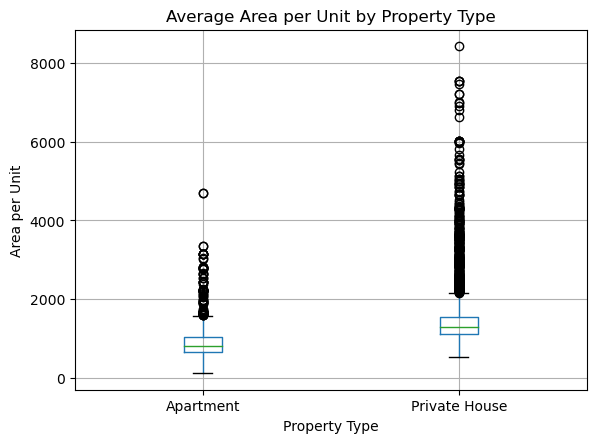

In [26]:
'''This code computes the average built area per residential unit and visualizes 
its distribution by property type using a boxplot.'''

plt.figure(figsize=(7,4))
df.boxplot(column='AreaPerUnit', by='apartment/privateProperty')
plt.title('Average Area per Unit by Property Type')
plt.suptitle('')
plt.ylabel('Area per Unit')
plt.xlabel('Property Type')
plt.show()

In [27]:
"""
Performs automatic feature selection for the XGBoost model using RFECV.
It identifies and returns the optimal list of features that yielded the highest Recall score,
while filtering out unnecessary noise.
"""

X_RFECV = df.drop(['SaleAboveAppraisedValue','SaleDate'], axis=1)
y_RFECV = df['SaleAboveAppraisedValue']

cols_for_onehot = ['AssrLandUse', 'apartment/privateProperty','SaleYear', 
                   'SaleQuarter','Price_Level'] 

cols_for_target_enc = ['xrBuildingTypeID','StreetNameAndWay','xrPrimaryNeighborhoodID','OwnerLastName','OwnerFirstName'
                       ,'num_of_transactions','Street_Popularity','BuildingType_Popularity','SaleMonth']

cols_for_standardization = ['LocationStartNumber','LandSF','TotalFinishedArea','LivingUnits','TotalAppraisedValue','AreaPerUnit',
                            'AppraisalPerSqFt','Land_to_Building_Ratio','Repeat_Grantor','Owner_Turnover_Rate']

numeric_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

onehot_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

target_enc_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('target', TargetEncoder(target_type='binary'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipe, cols_for_standardization),
        ('onehot', onehot_pipe, cols_for_onehot),
        ('target', target_enc_pipe, cols_for_target_enc)],
    remainder='drop', 
    verbose_feature_names_out=False )

clf = XGBClassifier(
    n_estimators=100, 
    random_state=42, 
    n_jobs=-1,
    eval_metric='logloss')

rfecv = RFECV(
    estimator=clf,
    step=2,              
    min_features_to_select=5,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='recall',
    n_jobs=-1)

main_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('selection', rfecv)])

X_RFECV_train, X_RFECV_test, y_RFECV_train, y_RFECV_test = train_test_split(X_RFECV, y_RFECV, test_size=0.2, random_state=42, stratify= y_RFECV)

print("Starting RFECV with XGBoost...")
main_pipeline.fit(X_RFECV_train, y_RFECV_train)

rfecv_step = main_pipeline.named_steps['selection']
preprocessor_step = main_pipeline.named_steps['preprocessor']
feature_names_out = preprocessor_step.get_feature_names_out()
selected_features = feature_names_out[rfecv_step.support_]

print(f"\nOptimal number of features: {rfecv_step.n_features_}")
print(f"Best Recall Score: {rfecv_step.cv_results_['mean_test_score'].max():.4f}")
print("\nSelected Features List:")
for f in selected_features:
    print(f"- {f}")

Starting RFECV with XGBoost...

Optimal number of features: 32
Best Recall Score: 0.6146

Selected Features List:
- LocationStartNumber
- LandSF
- TotalFinishedArea
- LivingUnits
- TotalAppraisedValue
- AreaPerUnit
- AppraisalPerSqFt
- Land_to_Building_Ratio
- Repeat_Grantor
- Owner_Turnover_Rate
- AssrLandUse_ONE FAMILY
- AssrLandUse_THREE FAMILY
- AssrLandUse_TWO FAMILY
- apartment/privateProperty_Apartment
- SaleYear_2020
- SaleYear_2021
- SaleYear_2022
- SaleYear_2023
- SaleYear_2024
- SaleQuarter_1
- SaleQuarter_3
- SaleQuarter_4
- Price_Level_High
- Price_Level_Medium
- xrBuildingTypeID
- StreetNameAndWay
- xrPrimaryNeighborhoodID
- OwnerLastName
- OwnerFirstName
- num_of_transactions
- Street_Popularity
- SaleMonth


# Prepare data for classification

### The objective of this study is to classify whether a property was sold above or below its appraised value. 
As no specific cost asymmetry between error types was assumed, model performance was evaluated using balanced metrics such as F1-score and ROC-AUC.

In [28]:

'''
We selected the final feature set to include information that is both relevant and available prior to the sale. 
The chosen features represent property characteristics, location, and the timing of the transaction, 
along with the appraised value. Legal and administrative identifiers were deliberately excluded in order to avoid 
redundancy and potential information leakage.
'''

numerical_features = ['LocationStartNumber','LandSF','TotalFinishedArea','LivingUnits','TotalAppraisedValue','AreaPerUnit',
                      'AppraisalPerSqFt','Land_to_Building_Ratio','Owner_Turnover_Rate','Repeat_Grantor']
high_cardinality_cols = ['xrPrimaryNeighborhoodID','num_of_transactions','StreetNameAndWay','OwnerLastName','SaleMonth','OwnerFirstName','Street_Popularity','BuildingType_Popularity', 'xrBuildingTypeID']
low_cardinality_cols = ['AssrLandUse', 'apartment/privateProperty', 'SaleYear', 'SaleQuarter']
features = numerical_features + high_cardinality_cols + low_cardinality_cols
target = 'SaleAboveAppraisedValue'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numerical_features),
        ('target_enc', TargetEncoder(target_type='binary'), high_cardinality_cols), 
        ('onehot', OneHotEncoder(handle_unknown='ignore'), low_cardinality_cols)])

models = {
    'Logistic Regression': Pipeline([('preprocessor', preprocessor), ('classifier', LogisticRegression(random_state=42))]),
    'Decision Tree': Pipeline([('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier(random_state=42))]),
    'Random Forest': Pipeline([('preprocessor', preprocessor), ('classifier', RandomForestClassifier(random_state=42))]),
    'XGBoost': Pipeline([('preprocessor', preprocessor), ('classifier', XGBClassifier(random_state=42))]),
    'SVM': Pipeline([('preprocessor', preprocessor), ('classifier', SVC(random_state=42, probability=True))])  }

results = []
for name, pipeline in models.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline.named_steps['classifier'], 'predict_proba') else None
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    cm = confusion_matrix(y_test, y_pred)
    
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Confusion Matrix': cm})

results_df = pd.DataFrame(results)
print(results_df.drop(columns=['Confusion Matrix']))

C:\Users\Tal_e\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.653372   0.663424  0.527864  0.587931  0.716757
1        Decision Tree  0.623640   0.603252  0.574303  0.588422  0.620164
2        Random Forest  0.671501   0.690335  0.541796  0.607112  0.735827
3              XGBoost  0.696882   0.689369  0.642415  0.665064  0.756667
4                  SVM  0.686730   0.718367  0.544892  0.619718  0.740268


### Since Recall is the most critical metric for this project, we evaluated the models based on this score.
### The results show that the XGBoost model achieved the highest Recall value.

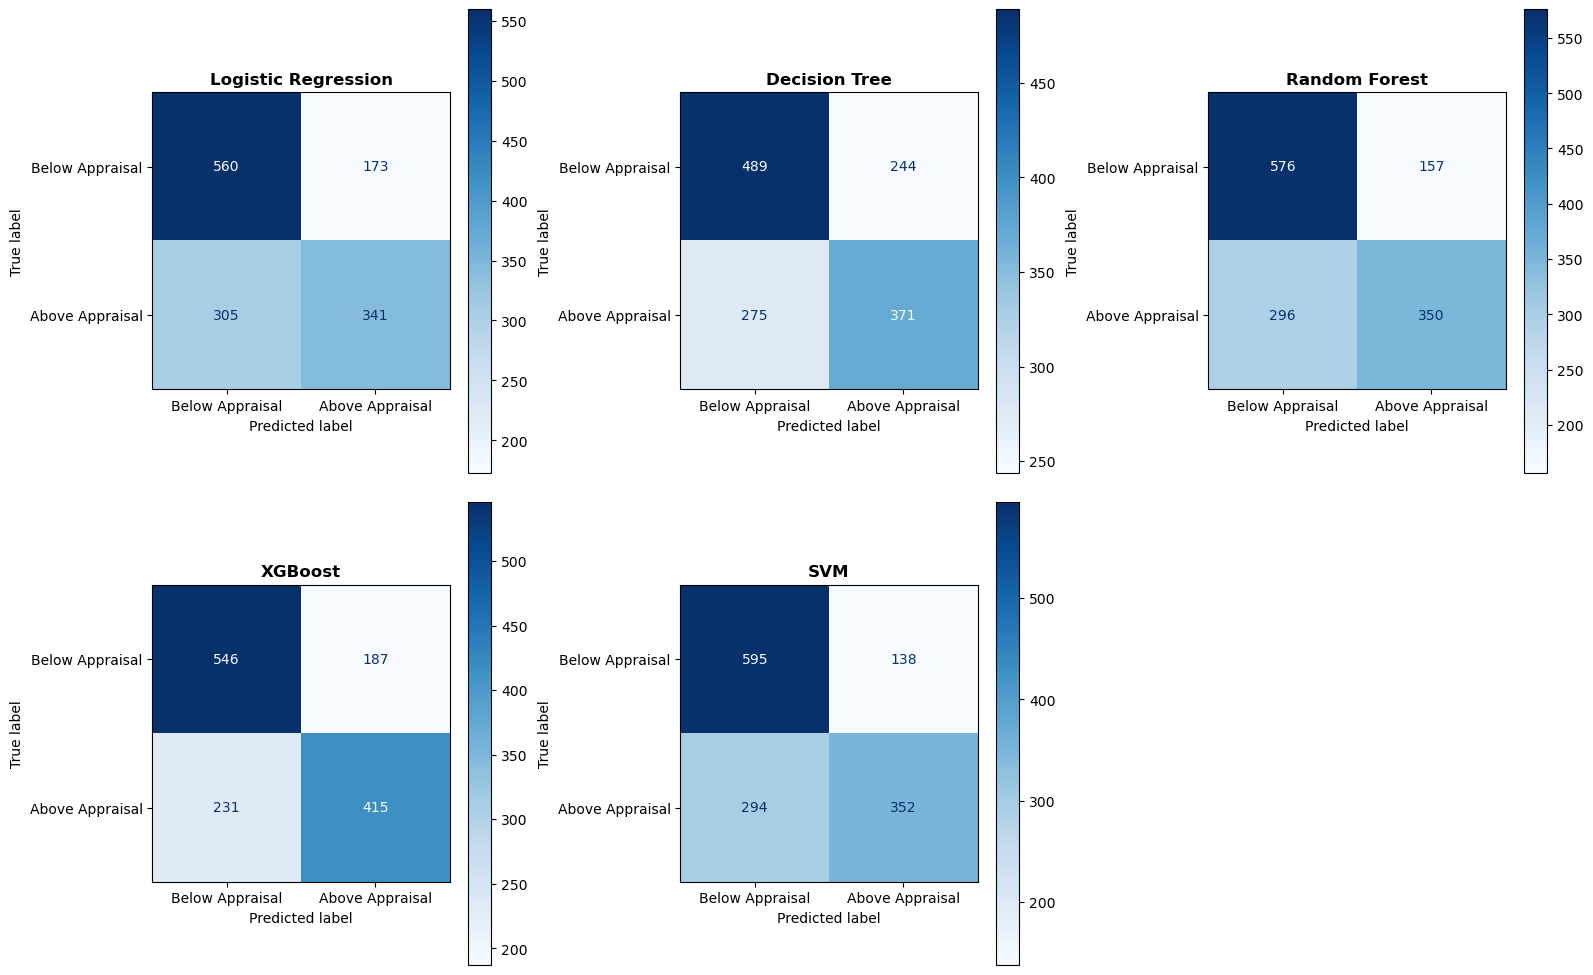

In [30]:
# A comprehensive comparison visualization of all models' confusion matrices

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'SVM']
cms = [result['Confusion Matrix'] for result in results]

for idx, (ax, name, cm) in enumerate(zip(axes, model_names, cms)):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Below Appraisal', 'Above Appraisal'])
    disp.plot(ax=ax, cmap='Blues', values_format='d')
    ax.set_title(f'{name}', fontsize=12, fontweight='bold')

axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

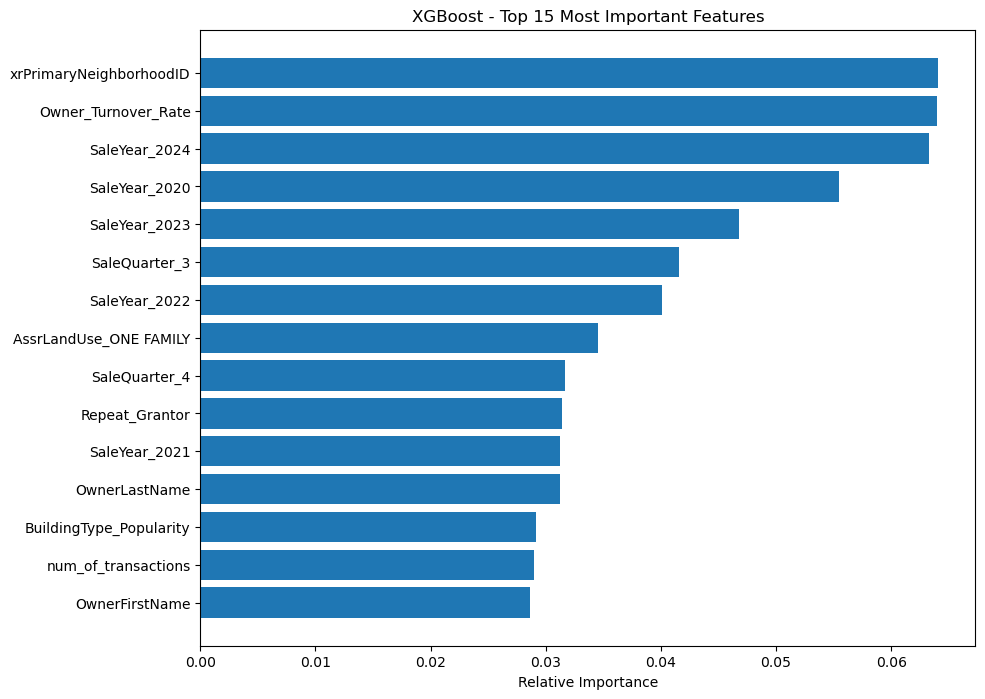

In [31]:
'''
Extracting the top 15 most important features
'''

pipeline = models['XGBoost']
xgboost_model = pipeline.named_steps['classifier']
preprocessor = pipeline.named_steps['preprocessor']
feat_names = list(numerical_features)
feat_names += list(high_cardinality_cols)
ohe_encoder = preprocessor.named_transformers_['onehot']
feat_names += list(ohe_encoder.get_feature_names_out(low_cardinality_cols))
importances = xgboost_model.feature_importances_
df_imp = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
df_imp = df_imp.sort_values('Importance', ascending=True).tail(15) 

plt.figure(figsize=(10, 8))
plt.title('XGBoost - Top 15 Most Important Features')
plt.barh(df_imp['Feature'], df_imp['Importance'])
plt.xlabel('Relative Importance')
plt.show()

## Hyperparameter tuning 

In [32]:
xgb_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        random_state=42,
        eval_metric='logloss',
        n_jobs=-1))])

param_dist = {
    'classifier__n_estimators': [200, 400, 600, 800, 1000],
    'classifier__max_depth': [None,3, 4, 5, 6, 8, 10],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2 ,0.3],
    'classifier__subsample': [0.5, 0.7, 0.85, 0.9],
    'classifier__colsample_bytree': [0.6, 0.7, 0.85, 0.9],
    'classifier__min_child_weight': [1, 3, 5, 7],
    'classifier__gamma': [0, 0.1, 0.2, 0.5],
    'classifier__reg_alpha': [0,0.01, 0.1, 1.0, 10],
    'classifier__reg_lambda': [0.1, 1.0, 2.0, 5.0, 10]}

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

search = RandomizedSearchCV(
    estimator=xgb_pipe,
    param_distributions=param_dist,
    n_iter=30,             
    scoring='recall',
    cv=cv,
    n_jobs=-1,
    verbose=1,
    random_state=42)

search.fit(X_train, y_train)

print("Best CV recall:", search.best_score_)
print("Best params:", search.best_params_)

best_xgb_model = search.best_estimator_

Fitting 10 folds for each of 30 candidates, totalling 300 fits
Best CV recall: 0.6301218161683277
Best params: {'classifier__subsample': 0.9, 'classifier__reg_lambda': 10, 'classifier__reg_alpha': 1.0, 'classifier__n_estimators': 600, 'classifier__min_child_weight': 3, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.2, 'classifier__gamma': 0.2, 'classifier__colsample_bytree': 0.6}


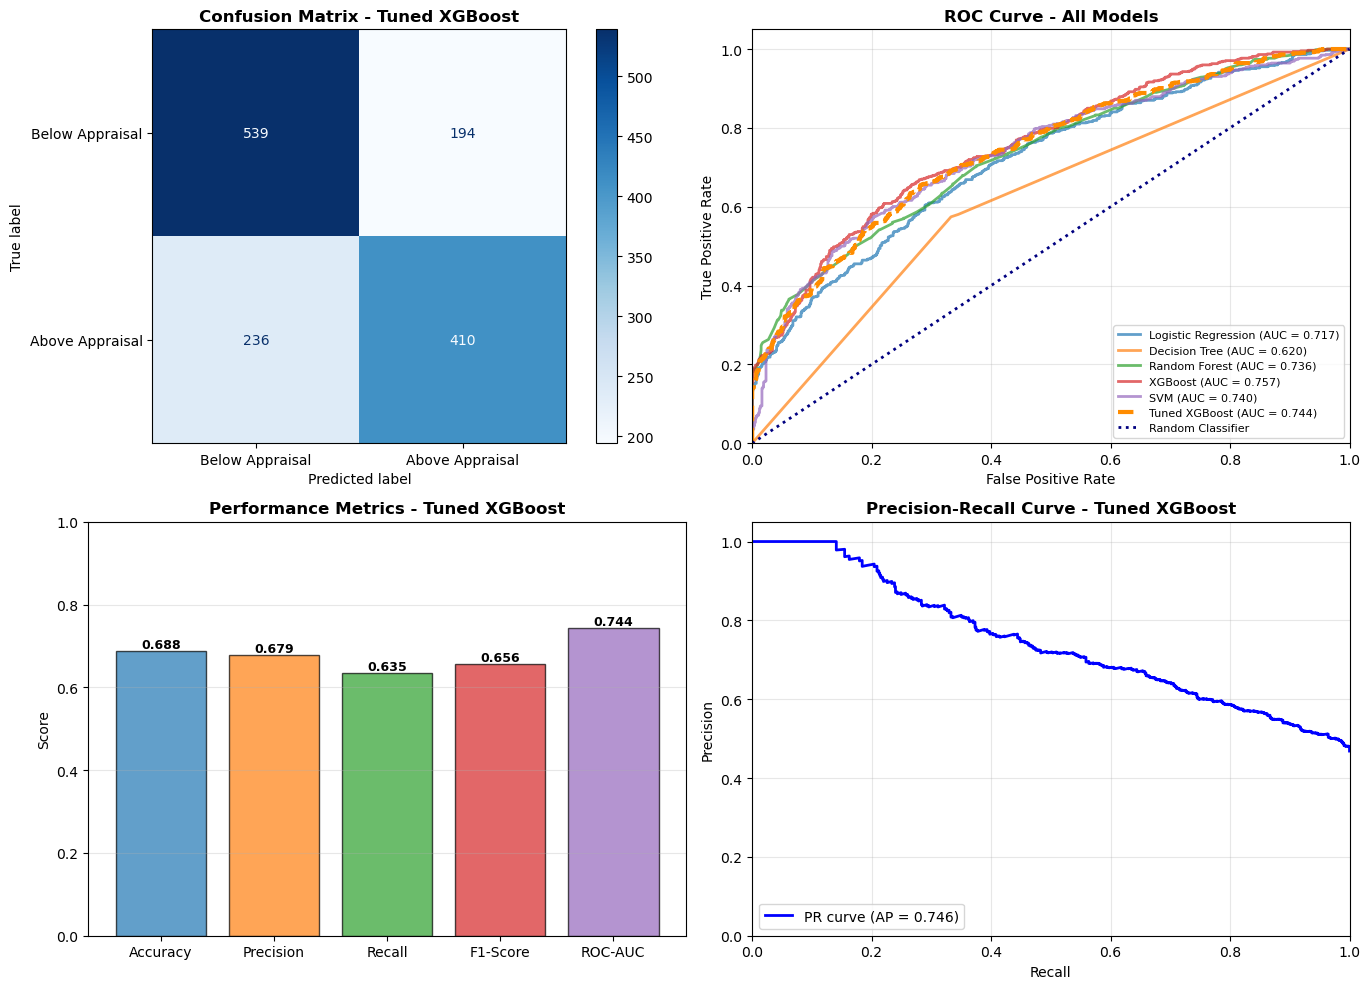


TUNED XGBOOST MODEL - PERFORMANCE SUMMARY
Accuracy:   0.6882
Precision:  0.6788
Recall:     0.6347
F1-Score:   0.6560
ROC-AUC:    0.7441

Confusion Matrix:
[[539 194]
 [236 410]]

True Negatives:  539
False Positives: 194
False Negatives: 236
True Positives:  410


In [33]:
# Create a comprehensive visualization of all metrics for the tuned XGBoost model
y_pred = best_xgb_model.predict(X_test)
y_proba = best_xgb_model.predict_proba(X_test)[:, 1]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Below Appraisal', 'Above Appraisal'])
disp.plot(ax=axes[0, 0], cmap='Blues', values_format='d')
axes[0, 0].set_title('Confusion Matrix - Tuned XGBoost', fontsize=12, fontweight='bold')

model_colors = {'Logistic Regression': '#1f77b4', 'Decision Tree': '#ff7f0e', 
                'Random Forest': '#2ca02c', 'XGBoost': '#d62728', 'SVM': '#9467bd'}

for result in results:
    model_name = result['Model']
    if result['ROC-AUC'] is not None:
        model_pipeline = models[model_name]
        y_proba_model = model_pipeline.predict_proba(X_test)[:, 1]
        fpr_model, tpr_model, _ = roc_curve(y_test, y_proba_model)
        roc_auc_model = auc(fpr_model, tpr_model)
        axes[0, 1].plot(fpr_model, tpr_model, lw=2, alpha=0.7,
                       color=model_colors.get(model_name, 'gray'),
                       label=f'{model_name} (AUC = {roc_auc_model:.3f})')

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
axes[0, 1].plot(fpr, tpr, color='darkorange', lw=3, linestyle='--',label=f'Tuned XGBoost (AUC = {roc_auc:.3f})')
axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle=':', label='Random Classifier')
axes[0, 1].set_xlim([0.0, 1.0])
axes[0, 1].set_ylim([0.0, 1.05])
axes[0, 1].set_xlabel('False Positive Rate', fontsize=10)
axes[0, 1].set_ylabel('True Positive Rate', fontsize=10)
axes[0, 1].set_title('ROC Curve - All Models', fontsize=12, fontweight='bold')
axes[0, 1].legend(loc="lower right", fontsize=8)
axes[0, 1].grid(alpha=0.3)

metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
metrics_values = [
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred),
    recall_score(y_test, y_pred),
    f1_score(y_test, y_pred),
    roc_auc_score(y_test, y_proba)
]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
bars = axes[1, 0].bar(metrics_names, metrics_values, color=colors, alpha=0.7, edgecolor='black')
axes[1, 0].set_ylim([0, 1])
axes[1, 0].set_ylabel('Score', fontsize=10)
axes[1, 0].set_title('Performance Metrics - Tuned XGBoost', fontsize=12, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

for bar, value in zip(bars, metrics_values):
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{value:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_proba)
avg_precision = average_precision_score(y_test, y_proba)
axes[1, 1].plot(recall_vals, precision_vals, color='blue', lw=2, label=f'PR curve (AP = {avg_precision:.3f})')
axes[1, 1].set_xlabel('Recall', fontsize=10)
axes[1, 1].set_ylabel('Precision', fontsize=10)
axes[1, 1].set_title('Precision-Recall Curve - Tuned XGBoost', fontsize=12, fontweight='bold')
axes[1, 1].legend(loc="lower left")
axes[1, 1].grid(alpha=0.3)
axes[1, 1].set_xlim([0.0, 1.0])
axes[1, 1].set_ylim([0.0, 1.05])

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("TUNED XGBOOST MODEL - PERFORMANCE SUMMARY")
print("="*60)
print(f"Accuracy:   {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision:  {precision_score(y_test, y_pred):.4f}")
print(f"Recall:     {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score:   {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC:    {roc_auc_score(y_test, y_proba):.4f}")
print("="*60)
print("\nConfusion Matrix:")
print(cm)
print(f"\nTrue Negatives:  {cm[0,0]}")
print(f"False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}")
print(f"True Positives:  {cm[1,1]}")
print("="*60)

Recall was selected as the primary evaluation metric to prioritize the identification of as many properties sold above their appraised value as possible (minimizing false negatives).

During the initial model comparison phase, all candidate models were evaluated under identical preprocessing and feature settings. Among these models, XGBoost achieved the highest Recall score, indicating its superior ability to detect relevant positive instances.

Based on this result, XGBoost was selected as the leading model. Hyperparameter tuning was subsequently applied to further explore whether its performance could be improved beyond the default configuration.

## Model Performance Analysis

### Confusion Matrix
This matrix displays where the model succeeded and where it failed, with the main diagonal representing correct predictions. Our data indicates that the model is **highly balanced**—the number of errors in both directions (misclassifying "above" vs. "below") is quite similar. This suggests that the model does not possess a strong bias toward one outcome and is not guessing blindly; rather, it has learned the underlying data structure effectively.

### ROC Curve (All Models)
This graph evaluates the model's ability to distinguish between the classes, where a curve arching toward the top-left corner indicates high quality. We can see that our selected model (XGBoost) is in the "top tier," clustered closely with other strong models. This proximity suggests that we have reached **data saturation**—meaning we have maximized the potential of the existing dataset, and our model provides valid, competitive results compared to the alternatives.

### Performance Metrics
This chart serves as a "scorecard," comparing various metrics to ensure performance isn't skewed. The standout result here is **stability and consistency**—all metrics are at a similar level. This is critical for the project, as it proves that our prioritization of Recall (maximizing transaction identification) did not come at the expense of overall accuracy. The model is robust and reliable across all parameters.

### Precision-Recall Curve
This curve illustrates the trade-off—the "price" we pay in Precision when attempting to capture more opportunities (Recall). In our case, we observe a relatively moderate decline rather than a sharp drop-off. This grants us **managerial flexibility**: the model allows us to target a larger share of relevant transactions without suffering a drastic loss in precision or generating an unmanageable number of false alarms.

## Unsupervised Analysis: Clustering
Exploring natural structure in the real-estate market using KMeans and DBSCAN clustering methods.

In [34]:
cat_features = ['AssrLandUse','apartment/privateProperty','xrBuildingTypeID']
num_features = ['TotalAppraisedValue','TotalFinishedArea','LivingUnits']

features = cat_features + num_features
X = df[features].dropna().copy()
te = TargetEncoder(target_type='continuous').set_output(transform= "pandas")
X_cat_enc = te.fit_transform(X[cat_features],X['TotalAppraisedValue'])

if not isinstance(X_cat_enc, pd.DataFrame):
    X_cat_enc = pd.DataFrame(X_cat_enc, index=X.index)

if X_cat_enc.shape[1] == len(cat_features):
    X_cat_enc.columns = cat_features

X_final = pd.concat([X_cat_enc, X[num_features]], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)
sil_scores = {}
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = km.fit_predict(X_scaled)
    sil_scores[k] = silhouette_score(X_scaled, labels)

best_k = max(sil_scores, key=sil_scores.get)

print("Silhouette scores:", sil_scores)
print("Best k by silhouette:", best_k)

kmeans = KMeans(n_clusters=best_k,init='k-means++', random_state=42, n_init='auto')
df.loc[X_cat_enc.index, 'Cluster_Categorical'] = kmeans.fit_predict(X_scaled)

print("\nCluster sizes:")
print(df.loc[X_cat_enc.index, 'Cluster_Categorical'].value_counts())
print("\nCategory distribution per cluster:")
for col in cat_features:
    print(f"\n{col}:")
    display(pd.crosstab(
        df.loc[X_cat_enc.index, 'Cluster_Categorical'],
        df.loc[X_cat_enc.index, col],
        normalize='index'))
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init='auto')
labels = kmeans.fit_predict(X_scaled)
df.loc[X.index, 'Cluster_Mixed'] = labels

Silhouette scores: {2: 0.5999020023473884, 3: 0.5646852417392334, 4: 0.5677670728875869, 5: 0.5901856542707699, 6: 0.5522379339841478}
Best k by silhouette: 2

Cluster sizes:
Cluster_Categorical
1.0    5179
0.0    1715
Name: count, dtype: int64

Category distribution per cluster:

AssrLandUse:


AssrLandUse,APT FOUR,CONDOMINIMUM,MULTI DWLG,ONE FAMILY,THREE FAMILY,TWO FAMILY
Cluster_Categorical,,,,,,
0.0,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
1.0,0.015061,0.0,0.001159,0.445839,0.300058,0.237884



apartment/privateProperty:


apartment/privateProperty,Apartment,Private House
Cluster_Categorical,,
0.0,1.000000,0.000000
1.0,0.016219,0.983781



xrBuildingTypeID:


xrBuildingTypeID,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,16.0,18.0,20.0,23.0
Cluster_Categorical,,,,,,,,,,,,,,,,,,
0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.004082,0.000000,0.000000,0.000583,0.000000,0.000000,0.000000,0.850729,0.129446,0.01516,0.000000
1.0,0.006565,0.003089,0.07067,0.092875,0.104846,0.129176,0.000965,0.032246,0.016606,0.004634,0.221085,0.299865,0.002124,0.000193,0.000000,0.000000,0.00000,0.015061


In [35]:
df.loc[X.index].groupby('Cluster_Mixed')[num_features].mean()

,TotalAppraisedValue,TotalFinishedArea,LivingUnits
Cluster_Mixed,,,
0.0,78426.938776,909.316991,1.021574
1.0,220961.656690,2541.128141,1.884727


### Clustering Analysis: Property Segmentation

To uncover distinct property profiles, we applied K-Means clustering on a mix of categorical (e.g., Land Use, Building Type) and numerical features (e.g., Area, Appraised Value).

**Optimal Number of Clusters**
The Silhouette Score analysis indicated that **k=2** is the optimal number of clusters (Score: 0.60), suggesting a clear natural separation in the data into two distinct groups.

**Cluster Profiles & Interpretation:**

* **Cluster 0 ("Condos & Apartments"):**
    * **Composition:** Contains 100% of the Condominiums and Apartments in the dataset.
    * **Physical Characteristics:** Smaller properties (Avg Area: ~909 sq ft) with typically single living units (~1.02).
    * **Value:** Lower average appraised value (~$78k).
    * *Insight:* Represents the "High Density / Compact Living" segment.

* **Cluster 1 ("Private & Multi-Family Homes"):**
    * **Composition:** Dominated by Private Houses (One, Two, and Three-Family homes).
    * **Physical Characteristics:** Significantly larger properties (Avg Area: ~2,541 sq ft) often containing multiple living units (Avg: ~1.88).
    * **Value:** Higher average appraised value (~$220k).
    * *Insight:* Represents the "Spacious / Landed Property" segment.

**Conclusion:**
The clustering successfully engineered a new feature, `Cluster_Mixed`, which acts as a powerful proxy for the property's overall "caliber" (Size + Type + Value), effectively distinguishing between compact apartments and substantial family homes.

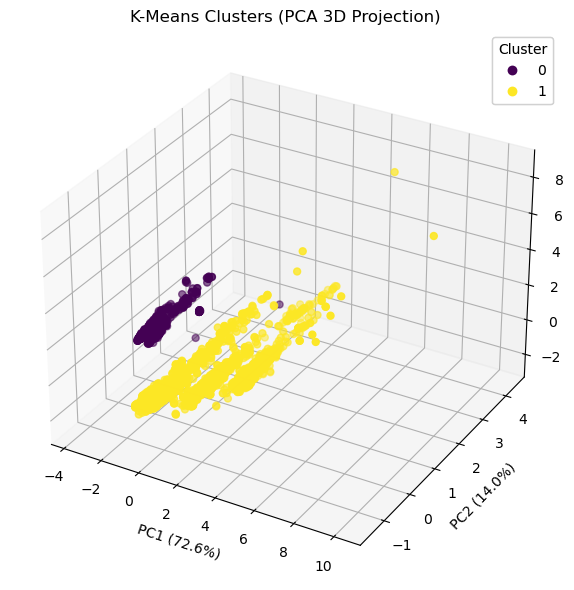

In [36]:
pca = PCA(n_components=3, random_state=42)
X_pca3 = pca.fit_transform(X_scaled)

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca3[:, 0], X_pca3[:, 1], X_pca3[:, 2],c=labels, s=25)

ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
ax.set_zlabel(f"PC3 ({pca.explained_variance_ratio_[2]*100:.1f}%)")
ax.set_title("K-Means Clusters (PCA 3D Projection)")

legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)

plt.tight_layout()
plt.show()

### 3D Cluster Visualization (PCA)

This graph projects the data into 3D space to visualize cluster quality. The axes represent **Principal Components (PCs)**—compressed "super-variables" derived from the original features. Notably, **PC1** alone captures **72.5%** of the variance.

**Key Observations:**

* **Absolute Separation:**
    A distinct physical gap exists between the **Purple points (Cluster 0 - Apartments)** and the **Yellow points (Cluster 1 - Houses)**. This visually confirms that the algorithm successfully distinguished between the property types.

* **Distinct Dispersion Patterns:**
    * **Cluster 0 (Apartments):** Dense and concentrated, reflecting the uniformity of apartments as standardized units.
    * **Cluster 1 (Houses):** Widely dispersed along the axis, illustrating the high variance in the private housing market (ranging from small old houses to luxury estates).

# DBSCAN

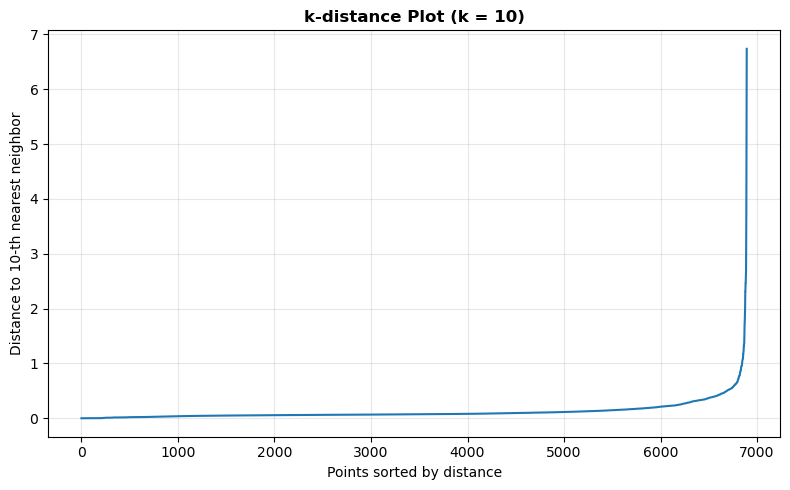

In [37]:
min_samples = 10 
nbrs = NearestNeighbors(n_neighbors=min_samples)
nbrs.fit(X_scaled)
distances, _ = nbrs.kneighbors(X_scaled)

k_dist = np.sort(distances[:, -1])

plt.figure(figsize=(8, 5))
plt.plot(k_dist)
plt.title(f'k-distance Plot (k = {min_samples})', fontsize=12, fontweight='bold')
plt.xlabel('Points sorted by distance', fontsize=10)
plt.ylabel(f'Distance to {min_samples}-th nearest neighbor', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [38]:
min_samples = 10
eps_range = np.arange(0.5, 1.0, 0.05)

best_eps, best_sil = None, -1

for eps in eps_range:
    labels = DBSCAN(eps=eps, min_samples=min_samples).fit_predict(X_scaled)
    mask = labels != -1
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    if n_clusters >= 2 and mask.sum() > 1:
        sil = silhouette_score(X_scaled[mask], labels[mask])
        if sil > best_sil:
            best_eps, best_sil = eps, sil

dbscan = DBSCAN(eps=best_eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(X_scaled)

df.loc[X.index, 'Cluster_DBSCAN'] = dbscan_labels

n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = np.sum(dbscan_labels == -1)

print(f"Best eps: {best_eps}")
print(f"Clusters: {n_clusters}")
print(f"Noise points: {n_noise} ({n_noise/len(dbscan_labels)*100:.2f}%)")
print("\nCluster sizes:")
print(pd.Series(dbscan_labels[dbscan_labels != -1]).value_counts().sort_index())


Best eps: 0.7000000000000002
Clusters: 6
Noise points: 48 (0.70%)

Cluster sizes:
0    2282
1    1682
2    1233
3    1551
4      72
5      26
Name: count, dtype: int64


C:\Users\Tal_e\AppData\Local\Temp\ipykernel_28460\889192688.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors_dbscan = plt.cm.get_cmap('tab10', max(len(unique_labels) - 1, 1) if -1 in unique_labels else len(unique_labels))


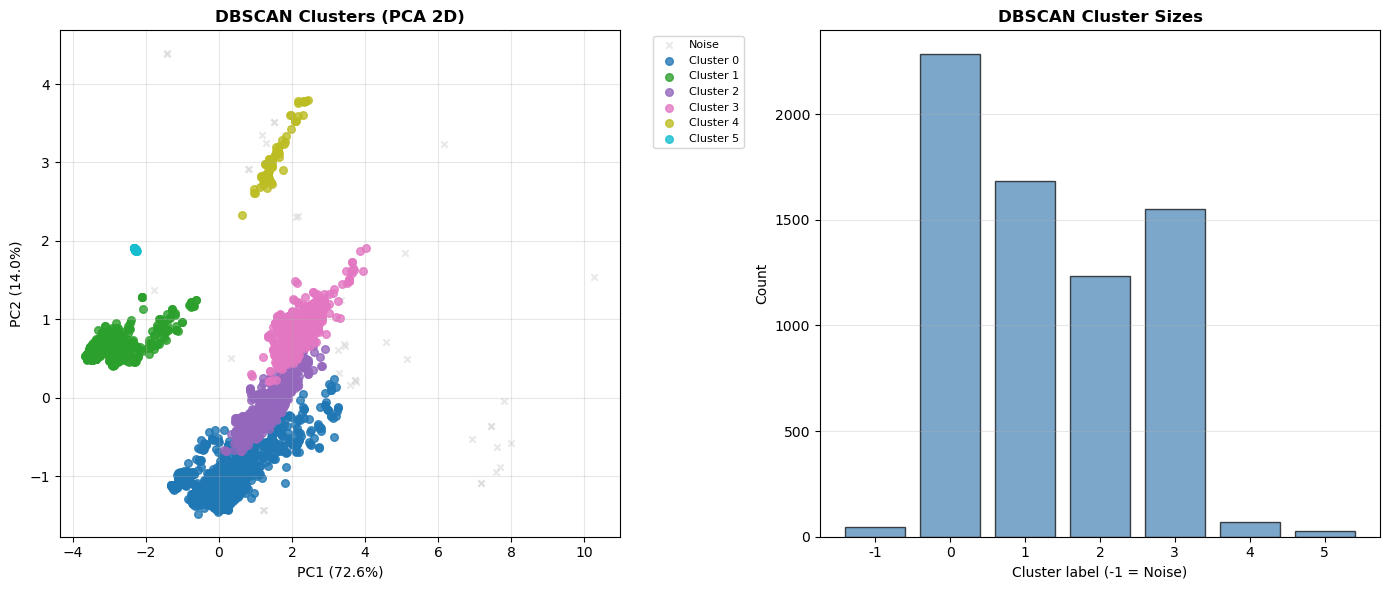

In [39]:
pca_2d = PCA(n_components=2, random_state=42)
coords_2d = pca_2d.fit_transform(X_scaled)

unique_labels = sorted(set(dbscan_labels))
colors_dbscan = plt.cm.get_cmap('tab10', max(len(unique_labels) - 1, 1) if -1 in unique_labels else len(unique_labels))

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for lab in unique_labels:
    mask = dbscan_labels == lab
    if lab == -1:
        axes[0].scatter(coords_2d[mask, 0], coords_2d[mask, 1],
                       c='lightgray', s=20, alpha=0.5, label='Noise', marker='x')
    else:
        axes[0].scatter(coords_2d[mask, 0], coords_2d[mask, 1],
                       c=[colors_dbscan(lab)], s=30, alpha=0.8, label=f'Cluster {lab}')

axes[0].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)', fontsize=10)
axes[0].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)', fontsize=10)
axes[0].set_title('DBSCAN Clusters (PCA 2D)', fontsize=12, fontweight='bold')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
axes[0].grid(alpha=0.3)

cluster_counts = pd.Series(dbscan_labels).value_counts().sort_index()
axes[1].bar(cluster_counts.index.astype(str), cluster_counts.values, 
           color='steelblue', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Cluster label (-1 = Noise)', fontsize=10)
axes[1].set_ylabel('Count', fontsize=10)
axes[1].set_title('DBSCAN Cluster Sizes', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


In [40]:
if 'Cluster_DBSCAN' in df.columns:
    core_mask = df.loc[X.index, 'Cluster_DBSCAN'] != -1

    if core_mask.sum() > 0:
        print("Average characteristics per DBSCAN cluster (excluding noise):")
        print("="*70)
        cluster_stats = df.loc[X.index][core_mask].groupby('Cluster_DBSCAN')[num_features].mean()
        display(cluster_stats)
        
        print("\nCategorical feature distribution per DBSCAN cluster:")
        print("="*70)
        for col in cat_features:
            print(f"\n{col}:")
            crosstab = pd.crosstab(
                df.loc[X.index, 'Cluster_DBSCAN'][core_mask],
                df.loc[X.index, col][core_mask],
                normalize='index')
            display(crosstab)
else:
    print("Please run the DBSCAN clustering cells first.")

Average characteristics per DBSCAN cluster (excluding noise):


,TotalAppraisedValue,TotalFinishedArea,LivingUnits
Cluster_DBSCAN,,,
0.0,195724.057844,1624.803676,1.0
1.0,77664.982164,884.904186,1.0
2.0,229372.911598,2701.345919,2.0
3.0,242061.521599,3610.150329,3.0
4.0,234679.166667,3997.448612,4.0
5.0,80061.538462,2306.769231,2.0



Categorical feature distribution per DBSCAN cluster:

AssrLandUse:


AssrLandUse,APT FOUR,CONDOMINIMUM,ONE FAMILY,THREE FAMILY,TWO FAMILY
Cluster_DBSCAN,,,,,
0.0,0.0,0.0,0.998685,0.000000,0.001315
1.0,0.0,1.0,0.000000,0.000000,0.000000
2.0,0.0,0.0,0.004866,0.001622,0.993512
3.0,0.0,0.0,0.000000,1.000000,0.000000
4.0,1.0,0.0,0.000000,0.000000,0.000000
5.0,0.0,1.0,0.000000,0.000000,0.000000



apartment/privateProperty:


apartment/privateProperty,Apartment,Private House
Cluster_DBSCAN,,
0.0,0.0,1.0
1.0,1.0,0.0
2.0,0.0,1.0
3.0,0.0,1.0
4.0,1.0,0.0
5.0,1.0,0.0



xrBuildingTypeID:


xrBuildingTypeID,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,16.0,18.0,20.0,23.0
Cluster_DBSCAN,,,,,,,,,,,,,,,,
0.0,0.014899,0.007011,0.160386,0.21078,0.234005,0.286152,0.001315,0.073181,0.001753,0.010517,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.004162,0.000000,0.000000,0.000000,0.000000,0.863853,0.131986,0.0,0.0
2.0,0.000000,0.000000,0.000000,0.00000,0.002433,0.004055,0.000000,0.000000,0.066504,0.000000,0.926196,0.000811,0.000000,0.000000,0.0,0.0
3.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0
4.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
5.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0


### DBSCAN Results Summary

**Parameters:** eps=0.75, min_samples=10

**Results:** 6 clusters identified, 48 noise points (0.7%)

**Cluster Insights:**
- **Cluster 0 (n=2,282):** Single-family homes (~$195K, 1,628 sq ft)
- **Cluster 1 (n=1,682):** Condominiums (~$77K, 885 sq ft)  
- **Cluster 2 (n=1,233):** Two-family properties (~$229K, 2,701 sq ft)
- **Cluster 3 (n=1,551):** Three-family properties (~$242K, 3,610 sq ft)
- **Cluster 4 (n=72):** Four-unit apartments (~$235K, 3,998 sq ft)
- **Cluster 5 (n=26):** Unique condominiums (~$80K, 2,307 sq ft)

**Key Findings:** DBSCAN successfully segmented properties by type and size. Minimal noise (0.74%) indicates consistent market density patterns. Unlike K-Means geometric partitions, DBSCAN reveals natural density-based market segments aligned with actual property categories.